In [1]:
from scipy.stats import poisson, gamma
from empiricaldist import Cdf, Pmf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
lam = 1.4
dist = poisson(lam)
type(dist)


scipy.stats._distn_infrastructure.rv_discrete_frozen

In [3]:
k = 4
dist.pmf(k)

np.float64(0.039471954028253146)

In [4]:
def make_poisson_pmf(lam, qs):
    """Make a Pmf of a Poisson distribution."""
    ps = poisson(lam).pmf(qs)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

In [5]:
goals = np.arange(0, 10)
pmf_goals = make_poisson_pmf(lam, goals)

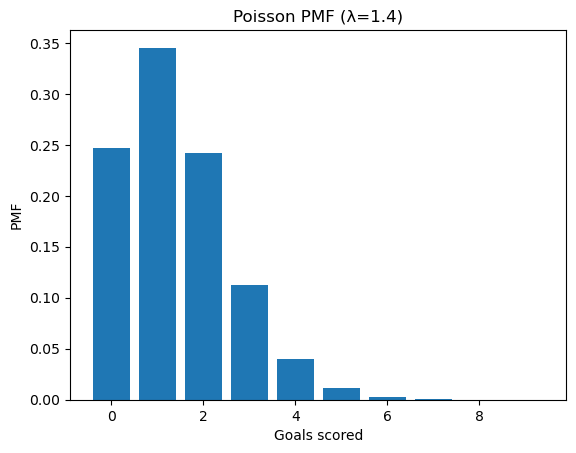

In [6]:
plt.bar(pmf_goals.qs, pmf_goals.ps)
plt.xlabel('Goals scored')
plt.ylabel('PMF')
plt.title(f'Poisson PMF (λ={lam})')
plt.show()

In [7]:
alpha = 1.4
qs = np.linspace(0, 10, 101)
ps = gamma(alpha).pdf(qs)

In [8]:
prior = Pmf(ps, qs)
prior.normalize()

np.float64(9.889360237140306)

In [9]:
lams = prior.qs
likelihood = poisson(lams).pmf(k)

In [10]:
def update_poisson(pmf, data):
    """Update a Poisson PMF with Poisson likelihood."""
    k = data
    lams = pmf.qs
    likelihood = poisson(lams).pmf(k)
    pmf *= likelihood
    pmf.normalize()
    return pmf

In [11]:
france = prior.copy()
update_poisson(france, 4)

,probs
0.0,0.000000
0.1,0.000003
0.2,0.000053
0.3,0.000260
0.4,0.000755
...,...
9.6,0.000009
9.7,0.000008
9.8,0.000007
9.9,0.000006


In [12]:
croatia = prior.copy()
update_poisson(croatia, 2)

,probs
0.0,0.000000e+00
0.1,1.154111e-03
0.2,4.987243e-03
0.3,1.080490e-02
0.4,1.764472e-02
...,...
9.6,3.699161e-07
9.7,3.104885e-07
9.8,2.605416e-07
9.9,2.185748e-07


In [13]:
print(croatia.mean(), france.mean())

1.6999765866755225 2.699772393342308


In [14]:
def prob_gt(pmf1, pmf2):
    """Compute the probability of superiority."""
    total = 0
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            if q1 > q2:
                total += p1 * p2
    return total

In [15]:
prob_gt(france, croatia)

0.7499366290930155

In [16]:
pmf_seq = [make_poisson_pmf(lam, goals) for lam in prior.qs]

In [17]:
def make_mixture(pmf, pmf_seq):
    """Make mixture of distributions."""
    df = pd.DataFrame(pmf_seq).fillna(0).transpose()
    df *= np.array(pmf)
    total = df.sum(axis=1)
    return Pmf(total)
    

In [18]:
pred_france = make_mixture(france, pmf_seq)

In [19]:
pred_croatia = make_mixture(croatia, pmf_seq)

In [20]:
win = Pmf.prob_gt(pred_france, pred_croatia)
win

np.float64(0.5703522415934519)

In [21]:
lose = Pmf.prob_lt(pred_france, pred_croatia)
lose

np.float64(0.26443376257235873)

In [22]:
tie = Pmf.prob_eq(pred_france, pred_croatia)
tie

np.float64(0.16521399583418947)